# minuteStepsNarrow_merged Dataset

Exploring Dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/minuteStepsNarrow_merged.csv'
df_steps = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df_steps.head())

           Id         ActivityMinute  Steps
0  1503960366  4/12/2016 12:00:00 AM      0
1  1503960366  4/12/2016 12:01:00 AM      0
2  1503960366  4/12/2016 12:02:00 AM      0
3  1503960366  4/12/2016 12:03:00 AM      0
4  1503960366  4/12/2016 12:04:00 AM      0


In [2]:
# Display basic information about the dataset
print(df_steps.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Steps           1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB
None


In [3]:
# Check for missing values
print(df_steps.isnull().sum())

Id                0
ActivityMinute    0
Steps             0
dtype: int64


Data Cleaning:

In [4]:
# Convert 'ActivityMinute' to datetime format
df_steps['ActivityMinute'] = pd.to_datetime(df_steps['ActivityMinute'])

# Data Cleaning
# Remove duplicates
df_steps.drop_duplicates(inplace=True) ,

C:\Users\intag\AppData\Local\Temp\ipykernel_7216\841841890.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_steps['ActivityMinute'] = pd.to_datetime(df_steps['ActivityMinute'])


KeyboardInterrupt: 

Data Visualization:

In [5]:
# Time series plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='ActivityMinute', y='Steps', data=df_steps)
plt.title('Steps Over Time')
plt.xlabel('Activity Minute')
plt.ylabel('Steps')
plt.show()

KeyboardInterrupt: 

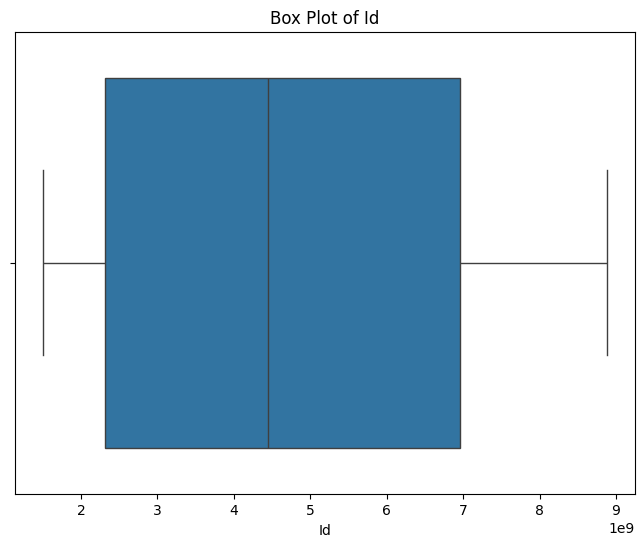

In [4]:
# Visualizing the outliers for the "Id" column.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_steps['Id'])
plt.title('Box Plot of Id')
plt.show()

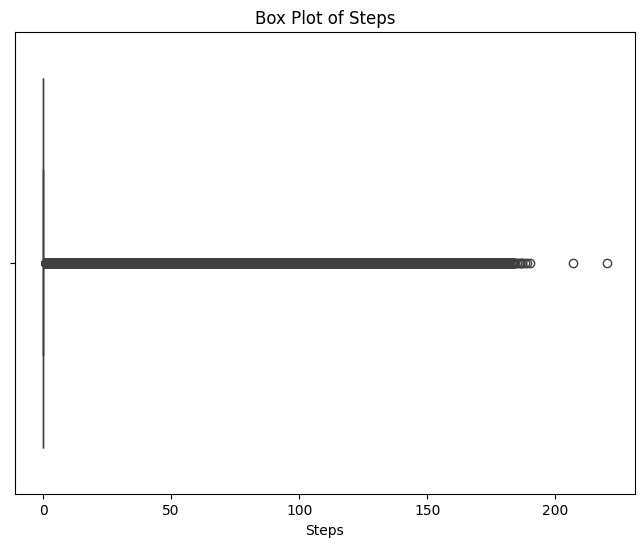

In [6]:
# Visualizing the outliers for the "Steps" column.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_steps['Steps'])
plt.title('Box Plot of Steps')
plt.show()

Removing Outliers

In [8]:
# We are applying capping
StepsUpperlimit = 0.0001

df_steps['Steps'] = df_steps['Steps'].clip(upper=StepsUpperlimit)
print("Capped Steps:")
print(df_steps['Steps'].describe())

Capped Steps:
count    1.325580e+06
mean     1.508095e-05
std      3.578632e-05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e-04
Name: Steps, dtype: float64


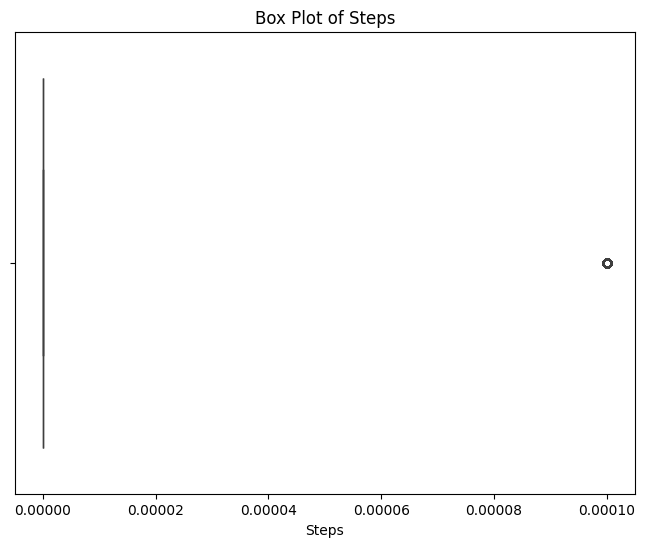

In [9]:
# Visualizing the outliers for the "Steps" column.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_steps['Steps'])
plt.title('Box Plot of Steps')
plt.show()

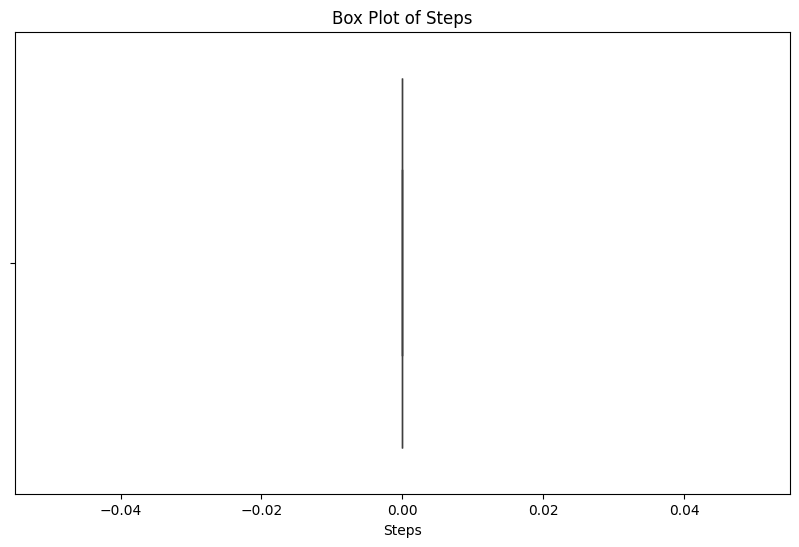

In [12]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers, outliers

# Remove outliers for 'Steps' column in 'minuteStepsNarrow_merged'
df_steps_no_outliers, outliers_steps = remove_outliers_iqr(df_steps, 'Steps')

# Display boxplot for 'Steps' column after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Steps', data=df_steps_no_outliers)
plt.title('Box Plot of Steps')
plt.xlabel('Steps')
plt.show()


In [10]:
# df_minute_intensities_wide is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteStepsNarrow_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
df_steps.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteStepsNarrow_merged_Filtered.csv
